In [2]:
import pandas as pd
import covid.util as util
import covid.jhu as jhu
import covid.covidtracking as covidtracking

import covid.states as states

import matplotlib.pyplot as plt

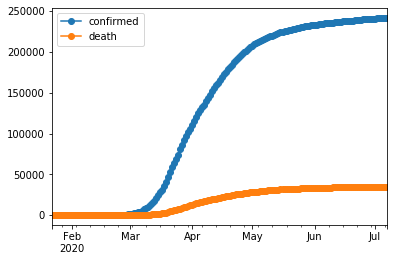

In [29]:
world = jhu.load_world()
world['Italy']['tot'].plot(style='-o')
plt.show()

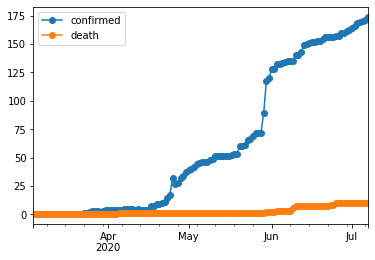

In [30]:
counties = jhu.load_us(counties=True)
start = '2020-03-04'
place = 'NC/Hertford'
counties[place][start:].plot(style='o-')
plt.show()

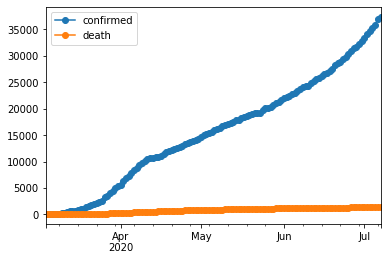

In [31]:
US = jhu.load_us()
start = '2020-03-04'
place = 'WA'
US[place][start:].plot(style='o-')
plt.show()

In [44]:
county_info = jhu.get_county_info().sort_values('Population', ascending=False)
pd.Series(county_info.index).to_csv('counties.txt', header=False, index=False)